In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

In [ ]:
tickers = ['RELIANCE.NS', 'INFY.NS', 'ICICIBANK.NS']

data = yf.download(tickers,
                   start='2020-01-01',
                   end='2025-05-31',
                   interval='1mo')['Close']

#calculate monthly returns (% change from previous month)
returns = data.pct_change().dropna()

print("Monthly Closing Prices:\n", data.head())
print("\nMonthly Returns (%):\n", returns.head())

[*********************100%***********************]  3 of 3 completed

Monthly Closing Prices:
 Ticker      ICICIBANK.NS     INFY.NS  RELIANCE.NS
Date                                             
2020-01-01    508.124146  680.825439   638.827637
2020-02-01    480.670990  642.000122   601.266785
2020-03-01    312.955719  562.857849   504.016083
2020-04-01    367.475281  627.786133   663.423157
2020-05-01    320.882355  606.289490   668.980835

Monthly Returns (%):
 Ticker      ICICIBANK.NS   INFY.NS  RELIANCE.NS
Date                                           
2020-02-01     -0.054028 -0.057027    -0.058797
2020-03-01     -0.348919 -0.123275    -0.161743
2020-04-01      0.174209  0.115355     0.316274
2020-05-01     -0.126792 -0.034242     0.008377
2020-06-01      0.058744  0.079549     0.163685


In [ ]:
#compute stock metrics
expected_returns = returns.mean()
std_devs = returns.std()
cov_matrix = returns.cov()

metrics_df = pd.DataFrame({
    'Expected Return': expected_returns,
    'Standard Deviation': std_devs
})
print("Stock Metrics:\n", metrics_df)
print("\nCovariance Matrix:\n", cov_matrix)

Stock Metrics:
               Expected Return  Standard Deviation
Ticker                                           
ICICIBANK.NS         0.020079            0.082719
INFY.NS              0.016027            0.081888
RELIANCE.NS          0.015508            0.079457

Covariance Matrix:
 Ticker        ICICIBANK.NS   INFY.NS  RELIANCE.NS
Ticker                                           
ICICIBANK.NS      0.006842  0.001282     0.002657
INFY.NS           0.001282  0.006706     0.002610
RELIANCE.NS       0.002657  0.002610     0.006313


In [ ]:
#portfolios with different weight combination
num_portfolios = 10000
rf_rate = 0.005  #monthly risk-free rate

results = np.zeros((3, num_portfolios))  #rows: return, std dev, sharpe
weights_record = []

for i in range(num_portfolios):
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)

    portfolio_return = np.dot(weights, expected_returns)
    portfolio_stddev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe= (portfolio_return - rf_rate) / portfolio_stddev

    results[0, i]= portfolio_return
    results[1, i]= portfolio_stddev
    results[2, i]= sharpe
    weights_record.append(weights)

In [ ]:
portfolios = pd.DataFrame({
    'Return': results[0],
    'StdDev': results[1],
    'SharpeRatio': results[2]
})
weights_df = pd.DataFrame(weights_record, columns=tickers)

In [ ]:
#find best weight combination
min_vol_idx = portfolios['StdDev'].idxmin()
max_sharpe_idx = portfolios['SharpeRatio'].idxmax()

min_var = portfolios.loc[min_vol_idx]
tan_port = portfolios.loc[max_sharpe_idx]

min_var_weights = weights_record[min_vol_idx]
tan_port_weights = weights_record[max_sharpe_idx]

In [ ]:
print("Minimum Variance Portfolio:")
print(min_var)

print("\nMinimum Variance Portfolio Weights:")
for ticker, weight in zip(tickers, min_var_weights):
    print(f"{ticker}: {weight:.4f}")

print("\nTangency Portfolio (Max Sharpe):")
print(tan_port)

print("\nTangency Portfolio (Max Sharpe) Weights:")
for ticker, weight in zip(tickers, tan_port_weights):
    print(f"{ticker}: {weight:.4f}")

Minimum Variance Portfolio:
Return         0.017323
StdDev         0.060369
SharpeRatio    0.204130
Name: 5257, dtype: float64

Minimum Variance Portfolio Weights:
RELIANCE.NS: 0.3553
INFY.NS: 0.3679
ICICIBANK.NS: 0.2768

Tangency Portfolio (Max Sharpe):
Return         0.018148
StdDev         0.062336
SharpeRatio    0.210914
Name: 6697, dtype: float64

Tangency Portfolio (Max Sharpe) Weights:
RELIANCE.NS: 0.5397
INFY.NS: 0.3324
ICICIBANK.NS: 0.1279


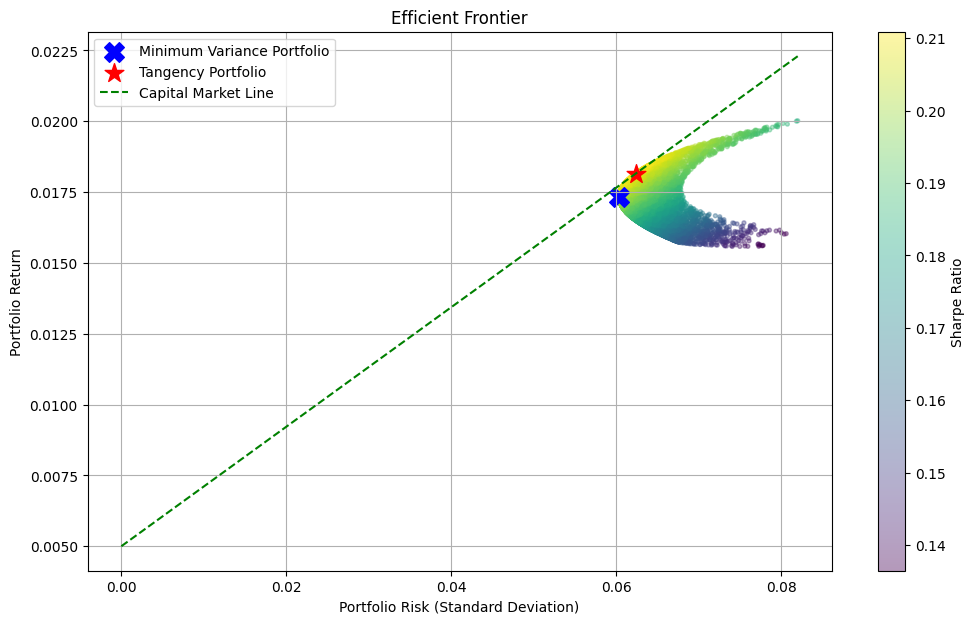

In [ ]:
#plot efficient frontier
plt.figure(figsize=(12, 7))
plt.scatter(portfolios['StdDev'], portfolios['Return'], c=portfolios['SharpeRatio'], cmap='viridis', s=8, alpha=0.4)
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Risk (Standard Deviation)')
plt.ylabel('Portfolio Return')
plt.title('Efficient Frontier')

#plot mvp and tangency
plt.scatter(min_var['StdDev'], min_var['Return'], marker='X', color='blue', s=200, label='Minimum Variance Portfolio')
plt.scatter(tan_port['StdDev'], tan_port['Return'], marker='*', color='red', s=200, label='Tangency Portfolio')

#Capital Market Line
x = np.linspace(0, max(portfolios['StdDev']), 100)
cml_y = rf_rate + tan_port['SharpeRatio'] * x
plt.plot(x, cml_y, linestyle='--', color='green', label='Capital Market Line')

plt.legend()
plt.grid(True)
plt.show()